In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latest = session.query(func.max(Measurement.date)).first()
latest

('2017-08-23')

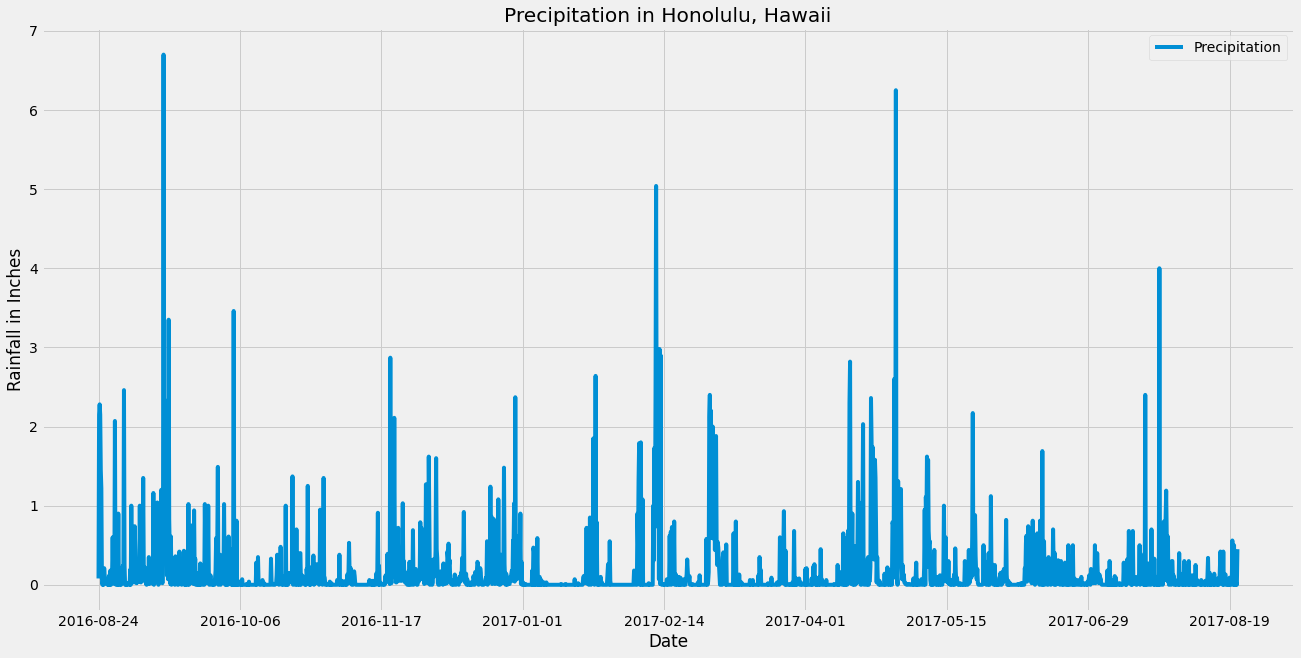

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database

# Calculate the date one year from the last date in data set.
firstdate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#firstdate

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > firstdate).all()
# precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns = ['Date', 'Precipitation']).set_index("Date")
#precipitation_df

# Sort the dataframe by date
precipitationsorted_df = precipitation_df.sort_values(by="Date", ascending=True)
#precipitationsorted_df

# Drop rows without data in precipitation
precipitationsortedclean_df = precipitationsorted_df.dropna()
#precipitationsortedclean_df

# Use Pandas Plotting with Matplotlib to plot the data
precipitationsortedclean_df.plot(figsize=(20,10))
plt.title("Precipitation in Honolulu, Hawaii")
plt.xlabel("Date")
plt.ylabel("Rainfall in Inches")
plt.savefig('Precipitation.png')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.id)).all()

[(9)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
maxstation = Stations[0][0]
#maxstation

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
LowestTemp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == maxstation).all()
HighestTemp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == maxstation).all()
AverageTemp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == maxstation).all()

print(f'Lowest temperature: {LowestTemp[0][0]}, highest: {HighestTemp[0][0]}, average: {AverageTemp[0][0]}')

Lowest temperature: 54.0, highest: 85.0, average: 71.66378066378067


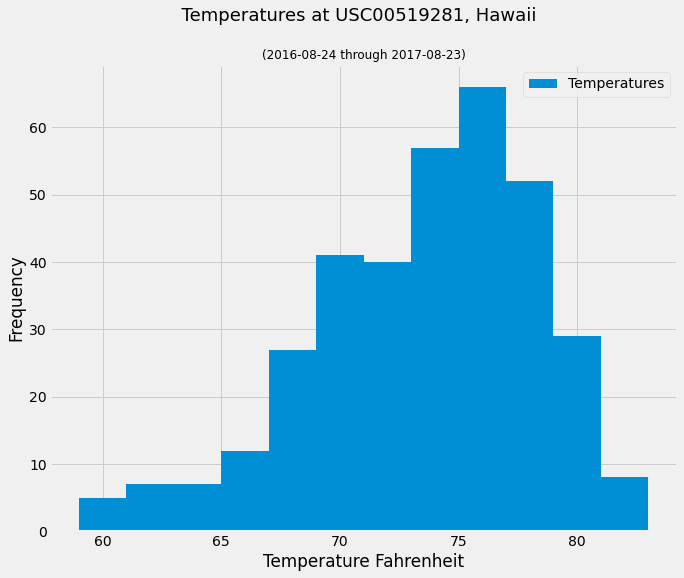

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == maxstation).filter(Measurement.date > firstdate).all()
#temperatures

temperatures_df = pd.DataFrame(temperatures, columns = ['Date', 'Temperatures'])
#temperatures_df.head()

temperatures_df.plot.hist(bins=12, figsize=(10,8))
plt.suptitle(f"  Temperatures at {maxstation}, Hawaii", fontsize=18)
plt.title("(2016-08-24 through 2017-08-23)", fontsize=12)
plt.xlabel("Temperature Fahrenheit")
plt.savefig('Temperatures.png')

# Close session

In [19]:
# Close Session
session.close()